<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-4 </h1> </html>

### Your first price forecast model

## S&P-500 Index Prices Forecast using a Multilayer Perceptron (MLP) Neural network

#### It is a training example of forecasting the S&P 500 Index at the prices of the previous minute of all shares included in this Index. The value of the Index is predicted for the next minute following the current minute.
#### A multilayer perceptron (MLP) Neural network with fully connected layers (dense) is used.
#### The dataset consists of the Index (outputs) and stock prices (inputs) for five months of 2017 of the S&P 500 constituents.

#### The S&P-500 (S&P) is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. The weight of each company in the index is proportional to its capitalization (more precisely, free-float)

#### "S&P-500 Index": (https://en.wikipedia.org/wiki/S%26P_500_Index)

#### ! Note that this notebook is a hands-on tutorial on machine learning in Finance. Live forecasting of stock prices is a challenging and complex task that requires tremendous effort, especially at higher frequencies, such as the one-minute timeframe used here.

##### **Source** - paper "A simple deep learning model for stock price prediction using TensorFlow":
(https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877).

.........................................................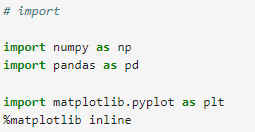

In [231]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

.........................................................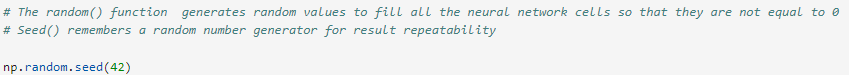

In [233]:
np.random.seed(42)

<html> <h3 style="color:blue;"> Dataset </h3> </html>

.........................................................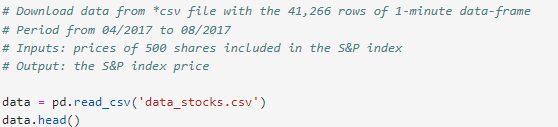

In [235]:
data = pd.read_csv('data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


.........................................................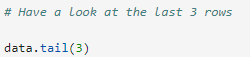

In [237]:
data.tail(3)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.52,114.47,47.150,142.33,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.40,114.33,47.135,142.17,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.47,114.46,47.150,142.41,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.52,114.47,47.150,142.33,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.40,114.33,47.135,142.17,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.47,114.46,47.150,142.41,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


.........................................................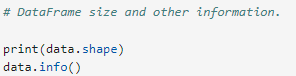

In [239]:
print(data.shape)
data.info()

(41266, 502)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


(41266, 502)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [ ]:
# We have 501 float64 and one int64 variables. All data are numerical!

.........................................................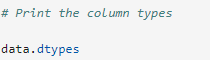

In [241]:
data.dtypes

DATE             int64
SP500          float64
NASDAQ.AAL     float64
NASDAQ.AAPL    float64
NASDAQ.ADBE    float64
                ...   
NYSE.XRX       float64
NYSE.XYL       float64
NYSE.YUM       float64
NYSE.ZBH       float64
NYSE.ZTS       float64
Length: 502, dtype: object

DATE             int64
SP500          float64
NASDAQ.AAL     float64
NASDAQ.AAPL    float64
NASDAQ.ADBE    float64
                ...   
NYSE.XRX       float64
NYSE.XYL       float64
NYSE.YUM       float64
NYSE.ZBH       float64
NYSE.ZTS       float64
Length: 502, dtype: object

In [49]:
# So we actually have 500 shares prices and an Index price for each minute

.........................................................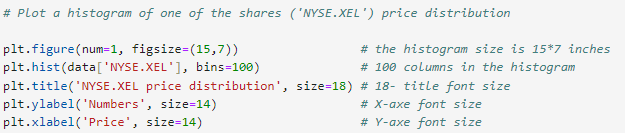

Text(0.5, 0, 'Price')

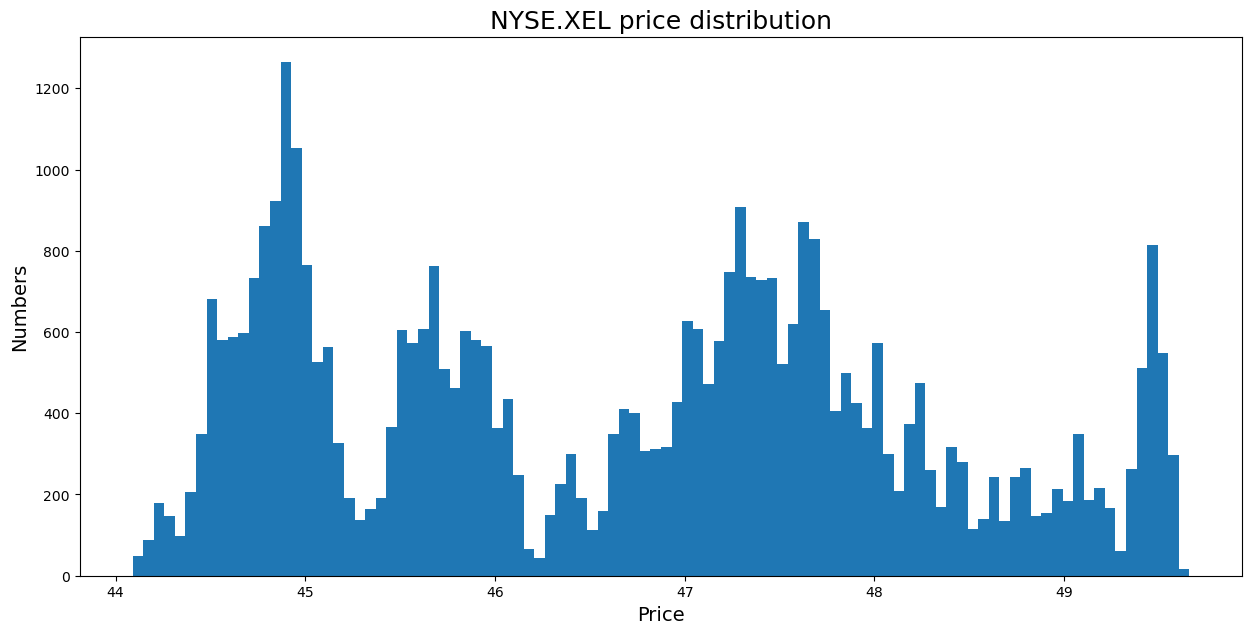

In [243]:
plt.figure(num=1, figsize=(15,7))
plt.hist(data['NYSE.XEL'], bins=100)
plt.title('NYSE.XEL price distribution', size=18)
plt.ylabel('Numbers', size=14)
plt.xlabel('Price', size=14)

Text(0.5, 0, 'Price')

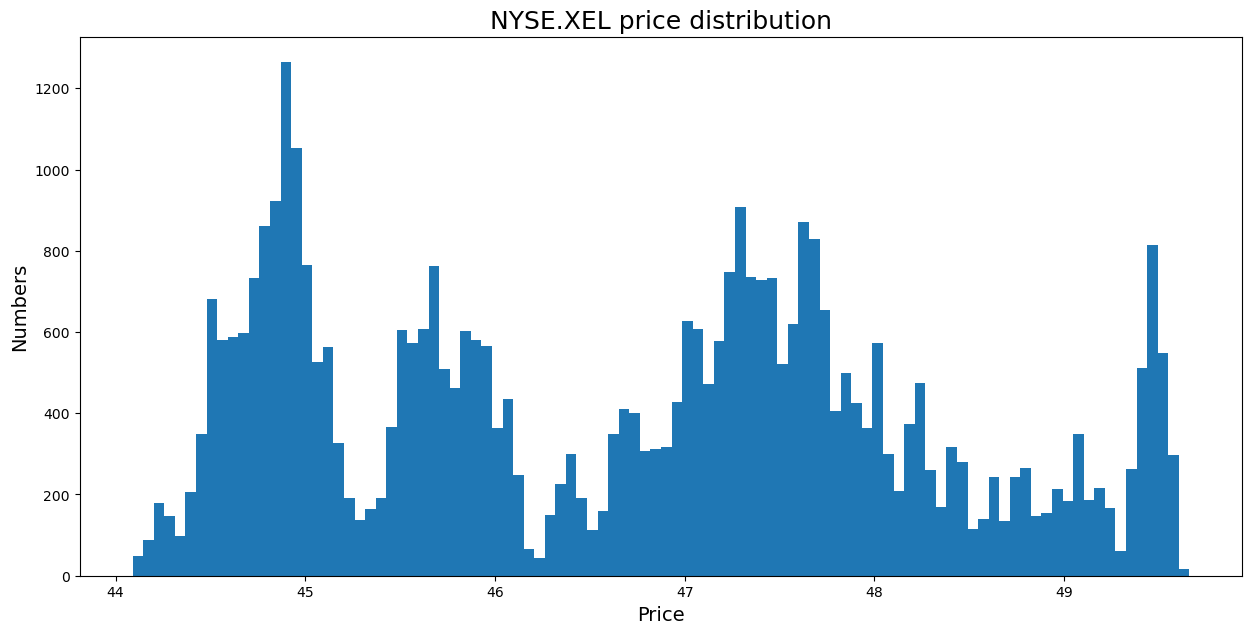

In [ ]:
# Guess visually where the support and resistance levels were

.........................................................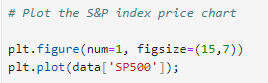

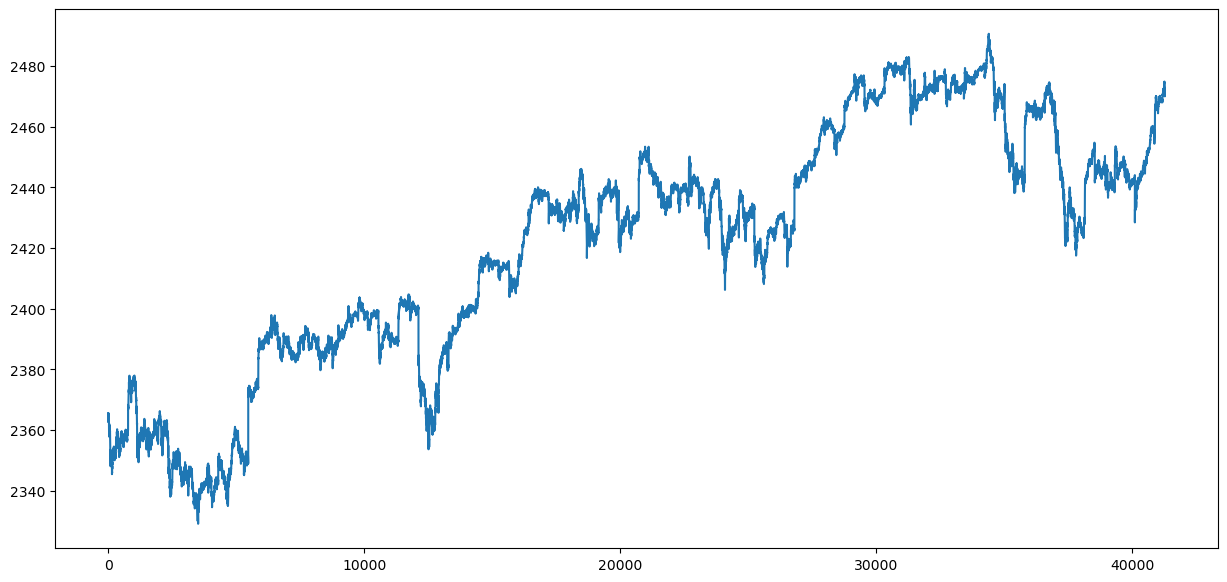

In [245]:
plt.figure(num=1, figsize=(15,7))
plt.plot(data['SP500']);

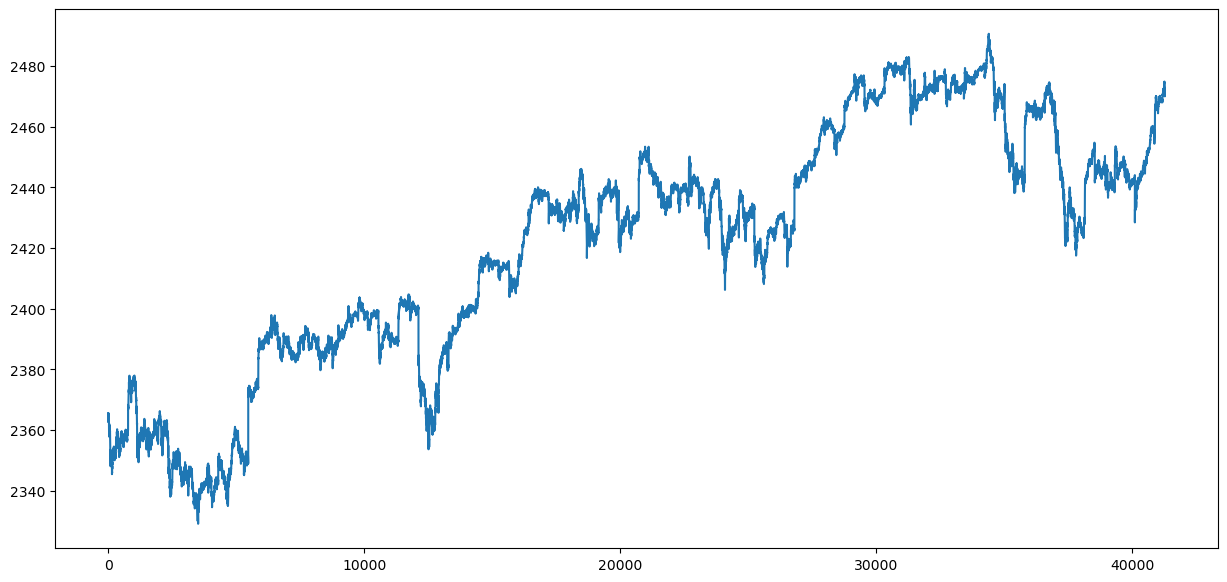

.........................................................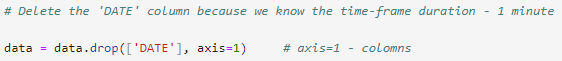

In [247]:
data =  data.drop(['DATE'], axis=1)

.........................................................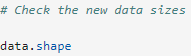

In [249]:
data.shape

(41266, 501)

(41266, 501)

<html> <h3 style="font-style:italic; color:blue;">  
The aim is to forecast the S&P-500 index prices soon (in our example, the S&P-500 price in the next minute). It requires some data preprocessing. 
    
You have to shift the S&P-500 forward one minute so that each row contains the prices of 500 shares in the current minute and the S&P-500 index price in the next minute.
</h3> </html>

.........................................................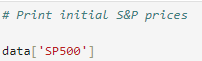

In [251]:
data['SP500']

0        2363.6101
1        2364.1001
2        2362.6799
3        2364.3101
4        2364.8501
           ...    
41261    2472.2200
41262    2471.7700
41263    2470.0300
41264    2471.4900
41265    2471.4900
Name: SP500, Length: 41266, dtype: float64

0        2363.6101
1        2364.1001
2        2362.6799
3        2364.3101
4        2364.8501
           ...    
41261    2472.2200
41262    2471.7700
41263    2470.0300
41264    2471.4900
41265    2471.4900
Name: SP500, Length: 41266, dtype: float64

.........................................................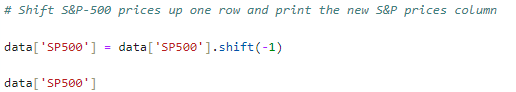

In [253]:
data['SP500'] = data['SP500'].shift(-1)
data['SP500']

0        2364.1001
1        2362.6799
2        2364.3101
3        2364.8501
4        2365.6201
           ...    
41261    2471.7700
41262    2470.0300
41263    2471.4900
41264    2471.4900
41265          NaN
Name: SP500, Length: 41266, dtype: float64

0        2364.1001
1        2362.6799
2        2364.3101
3        2364.8501
4        2365.6201
           ...    
41261    2471.7700
41262    2470.0300
41263    2471.4900
41264    2471.4900
41265          NaN
Name: SP500, Length: 41266, dtype: float64

In [30]:
# You can see that the S&P prices column was shifted up

.........................................................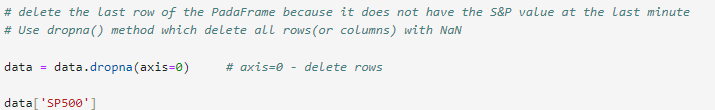

In [255]:
data = data.dropna(axis=0)
data['SP500']

0        2364.1001
1        2362.6799
2        2364.3101
3        2364.8501
4        2365.6201
           ...    
41260    2472.2200
41261    2471.7700
41262    2470.0300
41263    2471.4900
41264    2471.4900
Name: SP500, Length: 41265, dtype: float64

0        2364.1001
1        2362.6799
2        2364.3101
3        2364.8501
4        2365.6201
           ...    
41260    2472.2200
41261    2471.7700
41262    2470.0300
41263    2471.4900
41264    2471.4900
Name: SP500, Length: 41265, dtype: float64

.........................................................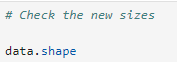

In [257]:
data.shape

(41265, 501)

In [ ]:
# Now we have one row less

.........................................................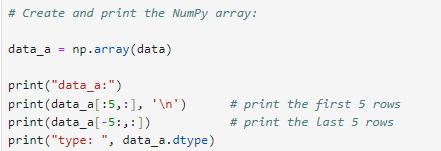

In [259]:
data_a = np.array(data)

print("data_a:")
print(data_a[:5,:],'\n')
print(data_a[-5:,:])
print("type: ", data_a.dtype)

data_a:
[[2364.1001   42.33    143.68   ...   63.86    122.       53.35  ]
 [2362.6799   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2364.3101   42.31    143.6901 ...   63.75    121.7      53.365 ]
 [2364.8501   42.37    143.64   ...   63.88    121.7      53.38  ]
 [2365.6201   42.5378  143.66   ...   63.91    121.695    53.24  ]] 

[[2472.22     44.71    164.14   ...   76.885   114.3      62.73  ]
 [2471.77     44.72    164.11   ...   76.88    114.31     62.725 ]
 [2470.03     44.73    164.12   ...   76.9     114.33     62.71  ]
 [2471.49     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]]
type:  float64


data_a:
[[2364.1001   42.33    143.68   ...   63.86    122.       53.35  ]
 [2362.6799   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2364.3101   42.31    143.6901 ...   63.75    121.7      53.365 ]
 [2364.8501   42.37    143.64   ...   63.88    121.7      53.38  ]
 [2365.6201   42.5378  143.66   ...   63.91    121.695    53.24  ]] 

[[2472.22     44.71    164.14   ...   76.885   114.3      62.73  ]
 [2471.77     44.72    164.11   ...   76.88    114.31     62.725 ]
 [2470.03     44.73    164.12   ...   76.9     114.33     62.71  ]
 [2471.49     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]]
type:  float64


.........................................................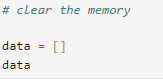

In [261]:
data = []
data

[]

[]

<html> <h3 style="color:blue;"> Data for training and testing </h3> </html>

.........................................................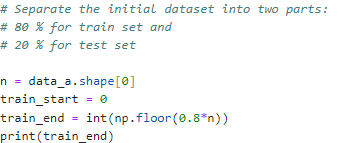

In [263]:
n = data_a.shape[0]
train_start = 0
train_end = int(np.floor(0.8*n))
print(train_end)

33012


33012


.........................................................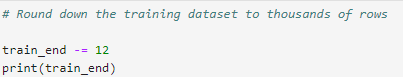

In [265]:
train_end -= 12
print(train_end)

33000


33000


.........................................................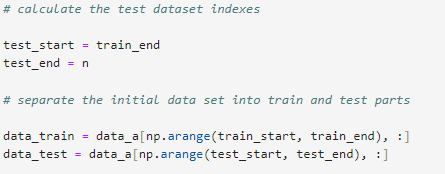

In [267]:
test_start = train_end
test_end = n

data_train = data_a[np.arange(train_start, train_end), :]
data_test = data_a[np.arange(test_start, test_end), :]

.........................................................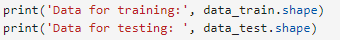

In [269]:
print('Data for training:', data_train.shape)
print('Data for testing:', data_test.shape)

Data for training: (33000, 501)
Data for testing: (8265, 501)


Data for training: (33000, 501)
Data for testing:  (8265, 501)


.........................................................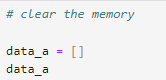
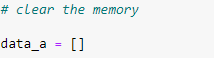

In [271]:
data_a = []
data_a

[]

[]

<html> <h3 style="color:blue;"> Data normalisation </h3> </html>

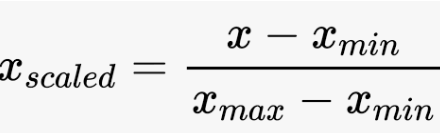

.........................................................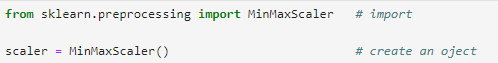

In [273]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


<html> <h3 style="color:red;"> !!! Note: </h3> </html>

<html> <h3 style="font-style:italic; color:blue;">  

A typical mistake when choosing a part of the data and time for scaling is to scale the entire dataset before dividing it into test and training data. It is a mistake because scaling starts the calculation of statistics, that is, minima/maxima of variables. When realising time series forecasting in real life, at the time of their generation, you cannot have information from observations in the future. 

Therefore, statistics should be calculated on the training data, and then the result should be applied to the test data. Otherwise, by taking information “from the future” to generate predictions (that is, from a test sample), the model will produce forecasts with “system bias.”

</h3> </html>

.........................................................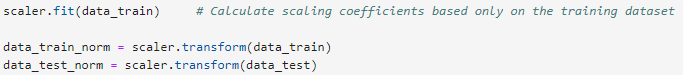

In [275]:
scaler.fit(data_train)

data_train_norm = scaler.transform(data_train)
data_test_norm = scaler.transform(data_test)

.........................................................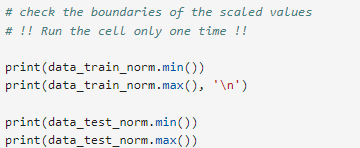

In [277]:
print(data_train_norm.min())
print(data_train_norm.max(),'\n')

print(data_test_norm.min())
print(data_test_norm.max())

0.0
1.0000000000000018 

-1.7208737864077674
2.115201718054915


0.0
1.0000000000000018 

-1.7208737864077674
2.115201718054915


The first two numbers above mean that all columns (stock prices and S&P index price) are normalised in the range [0,1].
In this case, the normalisation occurs for each column separately.

The following two numbers mean that there are stocks (not necessarily all of them) whose prices changed during the last 20% period (test dataset) in broader ranges than they changed during the first 80% period (training dataset).

It is acceptable that after normalisation, some stocks go beyond the range [0,1] since they still are in the same order with this range.

<html> <h3 style="color:blue;"> A matrix of input parameters and an output vector for training and test datasets </h3> </html>


In [51]:
# create two data sets: 
# for training: (X_train, y_train)
# and for tests: (X_test, y_test)

# X_train and X_test are matrixes with 1-minute time-frame prices of 500 stocks
# y_train and y_test are S&P-500 values in the next minute

.........................................................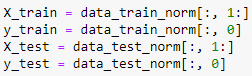

In [279]:
X_train = data_train_norm[:,1:]
y_train = data_train_norm[:,0]
X_test = data_test_norm[:,1:]
y_test = data_test_norm[:,0]


.........................................................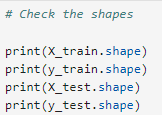
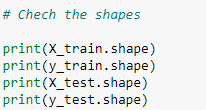

In [281]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(33000, 500)
(33000,)
(8265, 500)
(8265,)


(33000, 500)
(33000,)
(8265, 500)
(8265,)


<html> <h2 style="color:blue;"> Neural Network (Multilayer Perceptron - MLP) </h2> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next cells.

In [283]:
# import TensorFlow and Keras

import tensorflow as tf
from tensorflow import keras

In [69]:
# If you have a problem with TensorFlow import as shown above,
# you have to install TensorFlow:
# Otherwise, please ignore the next two cells


In [57]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install tensorflow

  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 47.1 MB/s eta 0:00:0000:0100:01
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 53.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<html> <h3 style="color:red;"> !! restart the kernel </h3> </html>

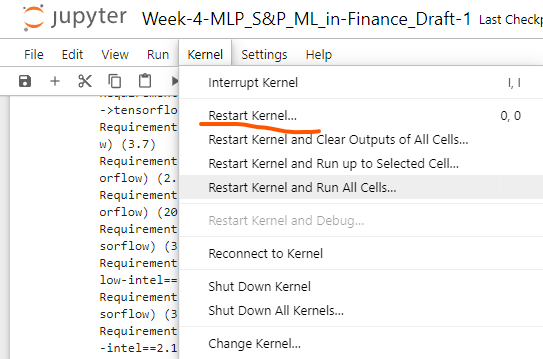

In [ ]:
# Run import TensoFlow after installing

In [285]:
# import TensorFlow and Keras

import tensorflow as tf
from tensorflow import keras

.........................................................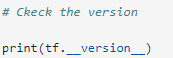

In [287]:
print(tf.__version__)

2.17.0


2.17.0


<html> <h4 style="color:blue;"> 

The Multilayer Perceptron architecture:

Number of input neurons = Number of stocks for training = 500
- Model (Neural network) consists of 4 hidden levels:
 - The first contains 1024 neurons, which is slightly more than twice the amount of input data
 - The subsequent hidden levels are half the previous level: 512, 256 and 128 neurons
 - Reducing the number of neurons at each level compresses the information that the network processed at previous levels
 - output layer - ONE neuron (predicted S&P price) as this is a regression task

</h4> </html>

.........................................................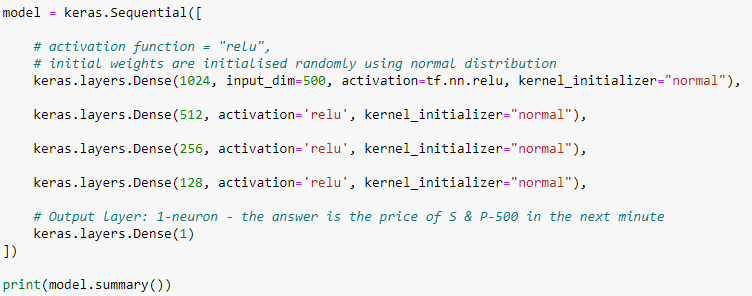

In [289]:
model =  keras.Sequential([
    keras.layers.Dense(1024, input_dim=500, activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.Dense(512, activation='relu', kernel_initializer="normal"),
    keras.layers.Dense(256, activation='relu', kernel_initializer="normal"),
    keras.layers.Dense(128, activation='relu', kernel_initializer="normal"),

    keras.layers.Dense(1)
])

print(model.summary())

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1024)           │       513,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,202,177 (4.59 MB)

 Trainable params: 1,202,177 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 1024)           │       513,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,202,177 (4.59 MB)

 Trainable params: 1,202,177 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

None


.........................................................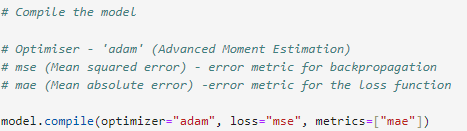

In [291]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

<html> <h3 style="color:blue;"> Training the Neural Network </h3> </html>

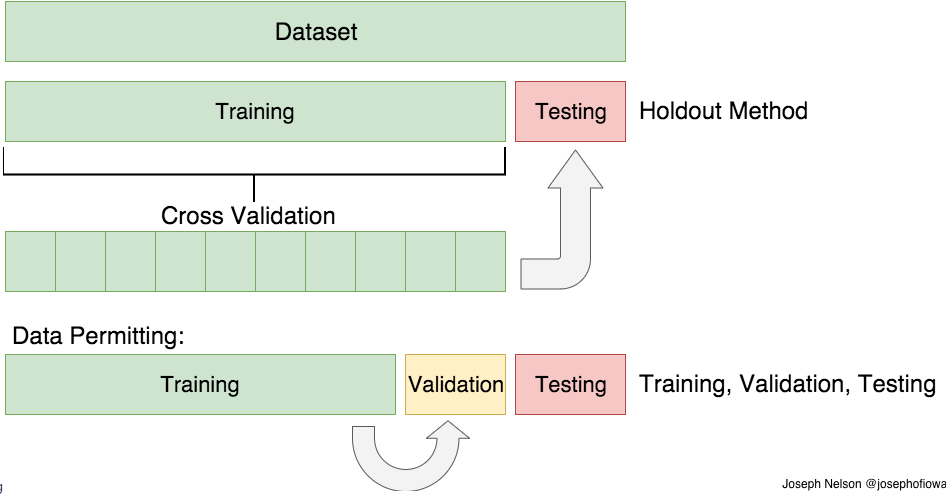

#### <font color='red'>!!! If neural network training is slow and you spend more than one minute on one epoch, restart the Kernel, reduce the number of epochs to 10, and run again.</font>

.................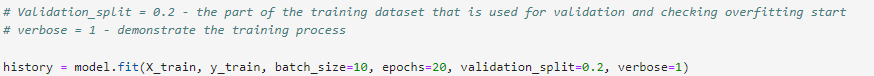

In [293]:
history = model.fit(X_train, y_train, batch_size=10, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0215 - mae: 0.0350 - val_loss: 0.0248 - val_mae: 0.1474
Epoch 2/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 2.6326e-04 - mae: 0.0124 - val_loss: 0.0091 - val_mae: 0.0872
Epoch 3/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.7512e-04 - mae: 0.0101 - val_loss: 0.0023 - val_mae: 0.0430
Epoch 4/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.2597e-04 - mae: 0.0085 - val_loss: 0.0014 - val_mae: 0.0328
Epoch 5/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.0594e-04 - mae: 0.0078 - val_loss: 6.3500e-04 - val_mae: 0.0205
Epoch 6/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.0469e-04 - mae: 0.0077 - val_loss: 8.3349e-04 - val_mae: 0.0243
Epoch 7/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 7.4423e-05 - mae: 0.0065 - val_loss: 8.6272e-04 - val_mae: 0.0254
Epoch 8/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 7.2415e-05 - mae: 0.0065 - val_loss: 3.3519e-04 - val_

Epoch 1/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0144 - mae: 0.0331 - val_loss: 0.0092 - val_mae: 0.0882
Epoch 2/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 2.1156e-04 - mae: 0.0112 - val_loss: 0.0034 - val_mae: 0.0517
Epoch 3/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.6885e-04 - mae: 0.0098 - val_loss: 0.0077 - val_mae: 0.0813
Epoch 4/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 1.2035e-04 - mae: 0.0085 - val_loss: 0.0017 - val_mae: 0.0368
Epoch 5/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 9.7802e-05 - mae: 0.0075 - val_loss: 9.3173e-04 - val_mae: 0.0260
Epoch 6/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 8.8725e-05 - mae: 0.0071 - val_loss: 6.2376e-04 - val_mae: 0.0206
Epoch 7/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 8.5525e-05 - mae: 0.0071 - val_loss: 2.6439e-04 - val_mae: 0.0130
Epoch 8/20
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 7.2732e-05 - mae: 0.0065 - val_loss: 2.2187e-04 - val_

<html> <h3 style="color:blue;"> Evaluation </h3> </html>

................................................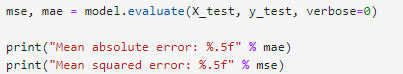

In [295]:
mse, mae = model.evaluate(X_test, y_test, verbose=0)

print("Mean absolute error: %.5f" % mae)
print("Mean squared error: %.5f" % mse)


Mean absolute error: 0.02138
Mean squared error: 0.00069


Mean absolute error: 0.02944
Mean squared error: 0.00125


<html> <h3 style="color:blue;"> Training process graph </h3> </html>

#### Mean Absolute Error (MAE) Chart

##### Now just press 'CTRL' and 'ENTER' keys on the next cells.

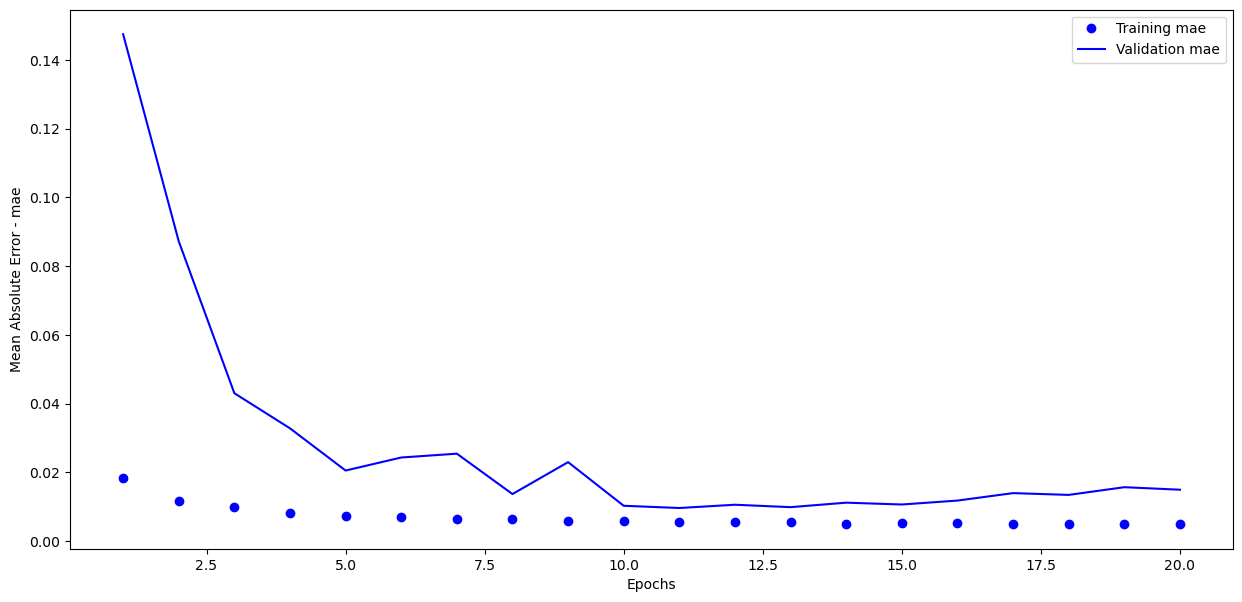

In [297]:
history_dict = history.history

mean_absolute_error_values = history_dict['mae']
val_mean_absolute_error_values = history_dict['val_mae']
epochs = range(1, len(mean_absolute_error_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mean_absolute_error_values, 'bo', label='Training mae')
plt.plot(epochs, val_mean_absolute_error_values, 'b', label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error - mae')
plt.legend()
plt.show()

##### Type the code below by copying and slightly changing the previous cell code

...................................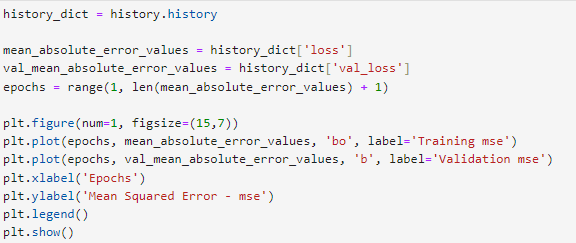

<function matplotlib.pyplot.show(close=None, block=None)>

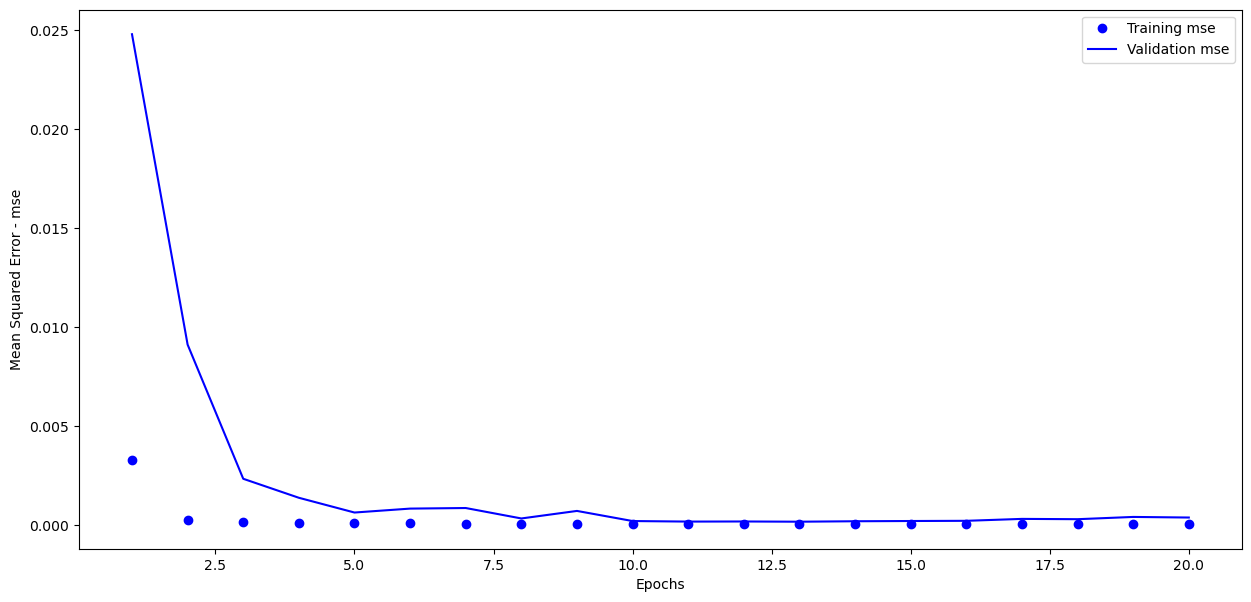

In [299]:
history_dict = history.history

mean_absolute_error_values = history_dict['loss']
val_mean_absolute_error_values = history_dict['val_loss']
epochs = range(1, len(mean_absolute_error_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mean_absolute_error_values, 'bo', label='Training mse')
plt.plot(epochs, val_mean_absolute_error_values, 'b', label='Validation mse')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error - mse')
plt.legend()
plt.show

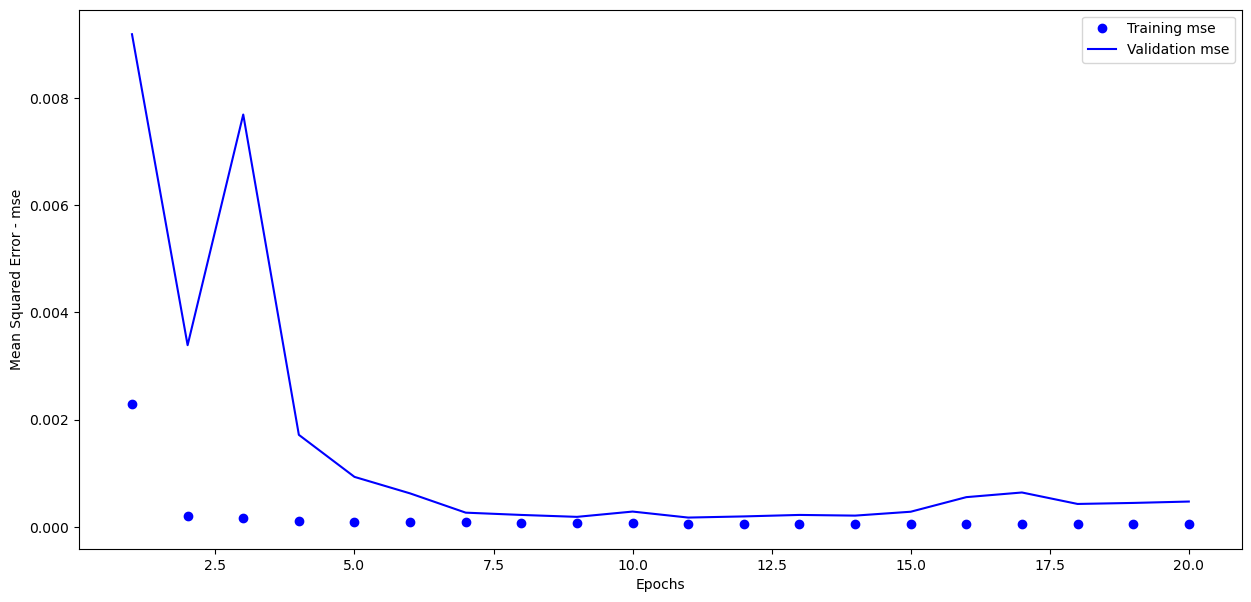

<html> <h3 style="color:blue;"> Using the neural network to predict the price of the S&P-500 </h3> </html>

In [61]:
# Based on the MinMaxScaler formula, let's calculate the parameters for restoring absolute prices from normalised ones.

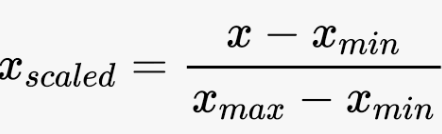

...................................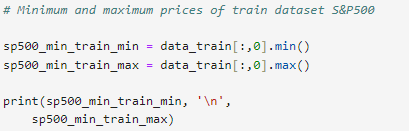

In [301]:
sp500_min_train_min = data_train[:,0].min()
sp500_min_train_max = data_train[:,0].max()

print(sp500_min_train_min, '\n', sp500_min_train_max)


2329.1399 
 2482.8701


2329.1399 
 2482.8701


........................................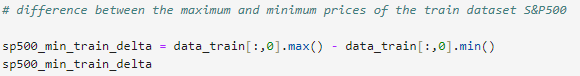

In [303]:
sp500_min_train_delta = data_train[:,0].max() - data_train[:,0].min()
sp500_min_train_delta

153.73019999999997

153.73019999999997

#### Now just press 'CTRL' and 'ENTER' keys on the next cells.

In [319]:
import random

pred = model.predict(X_test)

n_rec = random.randint(0, X_test.shape[0])

predicted_price = pred[n_rec][0] * sp500_min_train_delta + sp500_min_train_min
actual_price    = y_test[n_rec]  * sp500_min_train_delta + sp500_min_train_min

print(" Predicted price:", predicted_price, '\n' , 
      "Actual price:", actual_price, '\n', 
      "absolut error:", predicted_price - actual_price, '\n',
      "% absolut error:", (predicted_price - actual_price) / actual_price * 100,"%")

259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
 Predicted price: 2443.225436378372 
 Actual price: 2443.51 
 absolut error: -0.28456362162842197 
 % absolut error: -0.011645690896637294 %


<html> <h3 style="font-style:italic; color:red;">  
Run the previous cell several times and look at the results
</h3> </html>


<html> <h3 style="color:blue;">Describe the results in the cell below </h3> </html>

In [ ]:
#Answer: Each time you run the cell, a new record is randomly selected, 
# and the model's prediction for that specific test record is compared to its actual value. 
# This is why the predicted price, actual price, absolute error, and percent absolute error vary with each execution.

<html> <h3 style="color:blue;"> Price chart </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next cells.

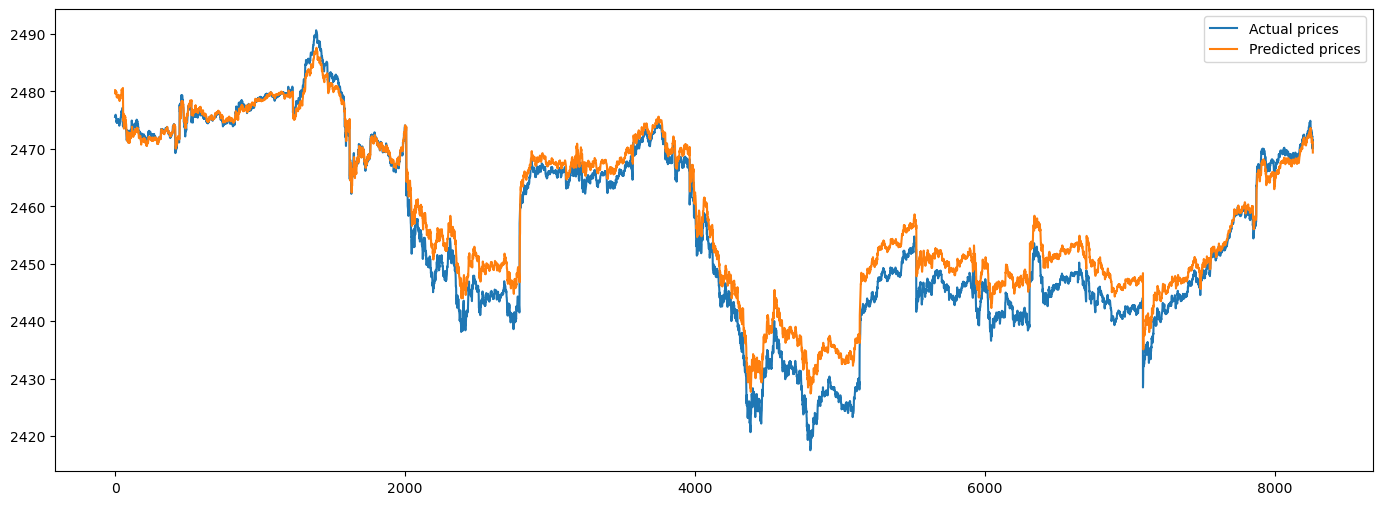

In [307]:
fig = plt.figure(figsize=(17,6)) 
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test * sp500_min_train_delta + sp500_min_train_min)
line2, = ax1.plot(pred[:,0] * sp500_min_train_delta + sp500_min_train_min)
plt.legend(labels=['Actual prices', 'Predicted prices'], loc='upper right')

plt.show();

<html> <h3 style="color:blue;"> Error Chart </h3> </html>

In [16]:
# Shows the absolute error in predicting the SP values ​​at each minute.

#### Now just press 'CTRL' and 'ENTER' keys on the next cells.

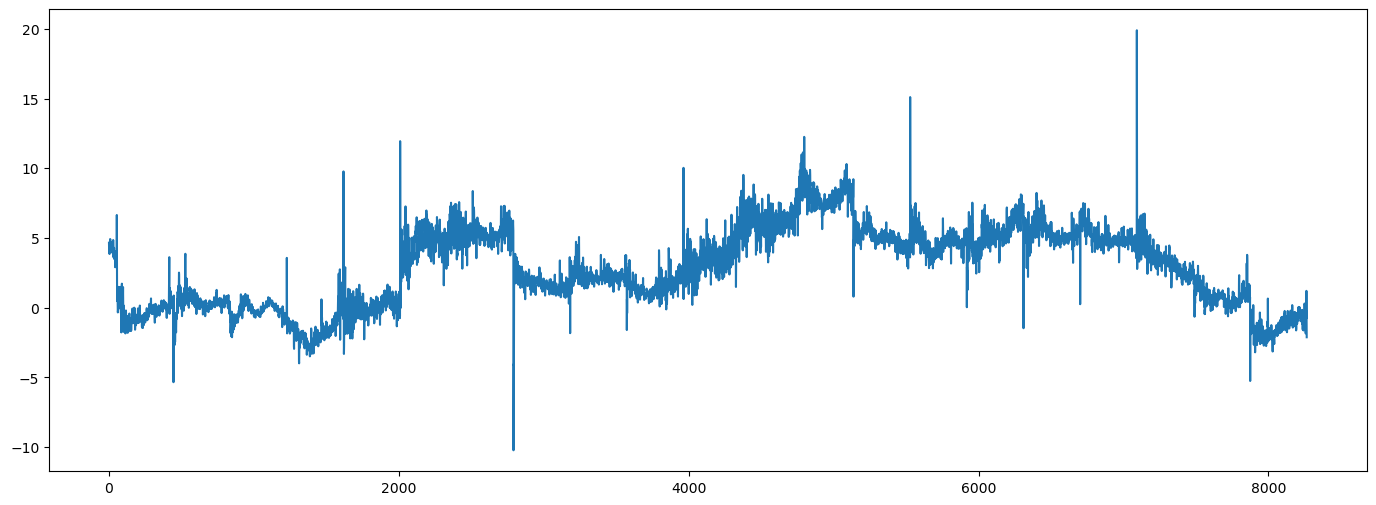

In [309]:
plt.ion()  # interactive mode, used for graphs of many functions 
# More details: https://www.geeksforgeeks.org/matplotlib-pyplot-ion-in-python/

fig = plt.figure(figsize=(17,6)) 
ax1 = fig.add_subplot(111)

a = (pred[:,0]-y_test) * sp500_min_train_delta
line1, = ax1.plot(a)

plt.show()

In [165]:
# Further improvement of the predictive system should be aimed at reducing the outliers on the graph.

# Lab Logbook Requirement:

<html> <h3 style="font-style:italic; color:blue;">
   
1) Create your own Multi-layer Perceptron (MLP) with two hidden layers, where the first hidden layer cells' number equals the last three digits of your SID. The number of cells in the next hidden layer is approximately two times smaller. For example, if your SID is 2287167, the number of cells on the first hidden layer is 167, and on the second - 84. Take epochs=10. Leave other parameters the same as in the practical session.
2) Compile the model.
3) Train your MLP with the same datasets and demonstrate the received MAE.
4) Compare your MAE with the MAE of the MLP in the practical session.
5) Please only add to your Lab Logbook a print-screen of your MLP architecture using model.summary() and the resulting MAE.
    
</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.
</h3> </html>

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 992)            │       496,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 496)            │       492,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 248)            │       123,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 124)            │        30,876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,143,777 (4.36 MB)

 Trainable params: 1,143,777 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0148 - mae: 0.0356 - val_loss: 0.0109 - val_mae: 0.0906
Epoch 2/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 2.3499e-04 - mae: 0.0117 - val_loss: 0.0103 - val_mae: 0.0917
Epoch 3/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 1.6052e-04 - mae: 0.0098 - val_loss: 0.0069 - val_mae: 0.0768
Epoch 4/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 1.4609e-04 - mae: 0.0091 - val_loss: 0.0039 - val_mae: 0.0569
Epoch 5/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 9.9861e-05 - mae: 0.0075 - val_loss: 0.0045 - val_mae: 0.0631
Epoch 6/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 9.6376e-05 - mae: 0.0075 - val_loss: 6.4271e-04 - val_mae: 0.0212
Epoch 7/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 7.1147e-05 - mae: 0.0065 - val_loss: 4.6514e-04 - val_mae: 0.0174
Epoch 8/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 7.2382e-05 - mae: 0.0065 - val_loss: 0.0011 - val_mae

<function matplotlib.pyplot.show(close=None, block=None)>

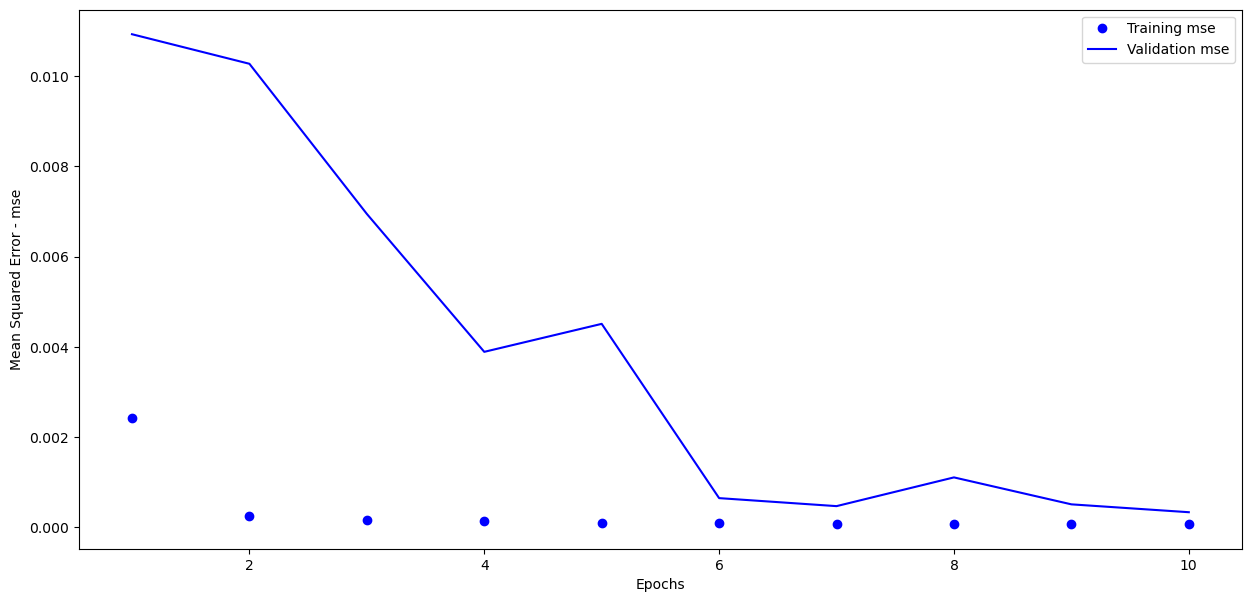

In [311]:
#SID = 2355992
model =  keras.Sequential([
    keras.layers.Dense(992, input_dim=500, activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.Dense(496, activation='relu', kernel_initializer="normal"),
    keras.layers.Dense(248, activation='relu', kernel_initializer="normal"),
    keras.layers.Dense(124, activation='relu', kernel_initializer="normal"),

    keras.layers.Dense(1)
])

print(model.summary())

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2, verbose=1)
mse, mae = model.evaluate(X_test, y_test, verbose=0)

print("Mean absolute error: %.5f" % mae)
print("Mean squared error: %.5f" % mse)

history_dict = history.history

mean_absolute_error_values = history_dict['loss']
val_mean_absolute_error_values = history_dict['val_loss']
epochs = range(1, len(mean_absolute_error_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mean_absolute_error_values, 'bo', label='Training mse')
plt.plot(epochs, val_mean_absolute_error_values, 'b', label='Validation mse')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error - mse')
plt.legend()
plt.show